# Distribution Analysis - check distribution as well as help to identify outliers

### Boxplot to check how distribution looks for a numerical KPI with respect to different categorical variables and check for outliers as well as skewness.
### W.r.t ML u can remove outliers if any or remove skewness as most ML algorithms expect normally distributed data so u might have to reduce skew in your input variables before modelling.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [4]:
data = pd.read_csv('/Users/sylvia/Desktop/datasets/employees_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.shape   # 1470 rows and 35 columns

(1470, 35)

### Boxplot for distribution of numerical KPI which is Monthly Income.

1. There r dots above upper whisker indicating outliers i.e employees having salary way higher than 17500.

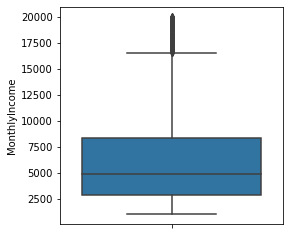

In [6]:
plt.figure(figsize=(4,4))
sns.boxplot(data=data, y='MonthlyIncome');

### To explore how this numerical KPI is effected by various Categorical Columns

1. Gender
2. Department
3. JobRole

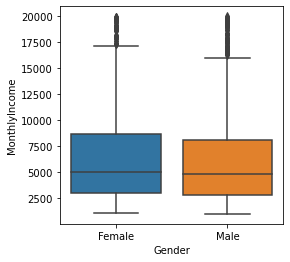

In [7]:
plt.figure(figsize=(4,4))
sns.boxplot(data=data, x='Gender', y='MonthlyIncome');

**Analysis**

Overall distribution of Monthly Income for male & female look same. So gender not influencing monthly income.

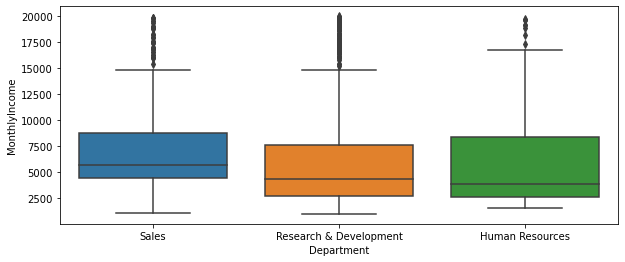

In [8]:
plt.figure(figsize=(10,4))
sns.boxplot(data=data, x='Department', y='MonthlyIncome');

**Analysis**

Sales Dept employees slightly higher monthly income compared to R&D and HR dept. The box is higher in case of Sales Dept.

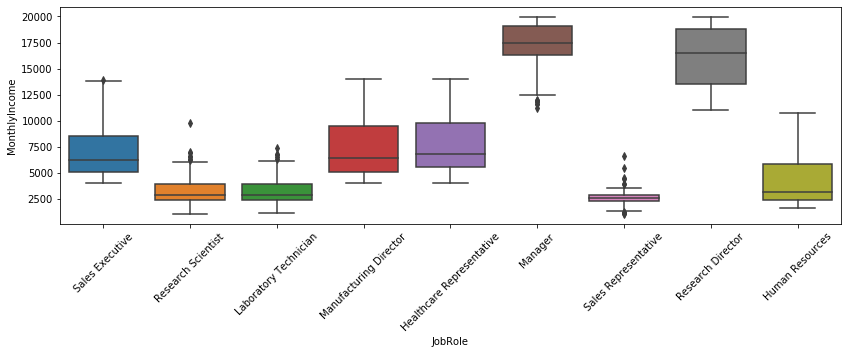

In [21]:
plt.figure(figsize=(14,4))
sns.boxplot(data=data, x='JobRole', y='MonthlyIncome')
plt.xticks(rotation=45)
plt.show()

**Analysis**

- A huge difference in mpnthly income when it comes to job role.
- When IQR is v small we can say that most of people in that group have similar monthly income.
- In case of research director IQR is varying hence hence cannot pinpoint about a salary for research director.
- U can also comment on whether it is normal, left or right skewed distribution-better visible with histograms.
- We can see outliers in Research scientist, Technician, Manager, Sales Representative.


### Detect Outliers 

After detectig outliers u need to decide which outlier treatment may be appropriate. You might want to reduce or increase those monthly income. You might want to impute missing values & then treat those missing value. 


In [10]:
sales_rep = data[data['JobRole'] == 'Sales Representative']
q1 = sales_rep['MonthlyIncome'].quantile(0.25)
q3 = sales_rep['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr
uw = q3 + 1.5 * iqr
lw, uw

(1307.25, 3821.25)

- Any Sales representative whose value is less than 1307 or more than 3821 can be considered as an outlier.
- There are 11 outliers.

In [11]:
sales_outliers = sales_rep[(sales_rep['MonthlyIncome'] < lw) | 
                           (sales_rep['MonthlyIncome'] > uw)]
print(len(sales_outliers))
sales_outliers.head()

11


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
238,32,0,Travel_Rarely,1401,Sales,4,2,Life Sciences,1,330,...,1,80,1,6,5,3,4,3,1,2
301,18,0,Travel_Rarely,812,Sales,10,3,Medical,1,411,...,1,80,0,0,2,3,0,0,0,0
539,50,0,Travel_Rarely,316,Sales,8,4,Marketing,1,738,...,4,80,1,4,2,3,2,2,2,2
564,45,0,Travel_Rarely,954,Sales,2,2,Technical Degree,1,783,...,1,80,0,9,3,3,8,7,3,1
764,28,0,Travel_Rarely,1144,Sales,10,1,Medical,1,1056,...,2,80,0,1,5,3,1,0,0,0


In [12]:
sales_outliers.index.tolist()

[238, 301, 539, 564, 764, 911, 1021, 1220, 1308, 1338, 1365]

### Check distribution for MonthlyIncome using Histogram and density plot.

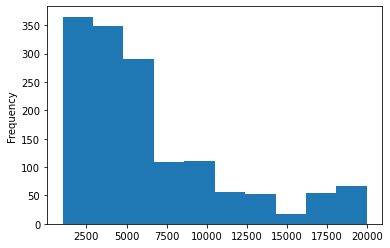

In [13]:
data.MonthlyIncome.plot.hist();

**Analysis**

There is a long right tail so it is a right skewed distribution (skew or less data on right side) i.e. most of data concentrated on left side.

**Check amount of skew in data**

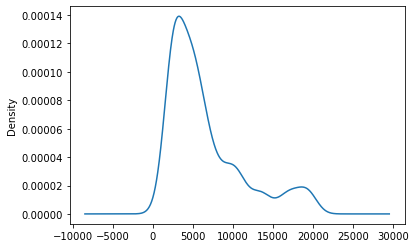

In [14]:
data.MonthlyIncome.plot.kde();

In [15]:
data.MonthlyIncome.skew()

1.3698166808390662

**Log transformation/square root transformation to remove skew in data**

Skew is removed to some extent & moving close to normal distribution.

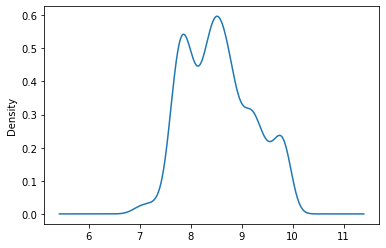

In [16]:
np.log(data.MonthlyIncome).plot.kde();

In [17]:
np.log(data.MonthlyIncome).skew()

0.2861922926389174

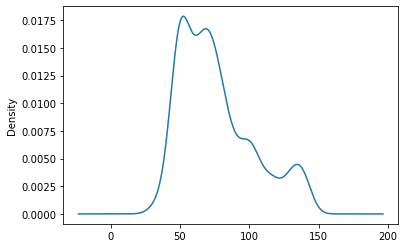

In [20]:
np.sqrt(data.MonthlyIncome).plot.kde();

In [19]:
np.sqrt(data.MonthlyIncome).skew()

0.8619596187321055

**Analysis**

We see that log transformation reduce skew better than square root transformation in this case.

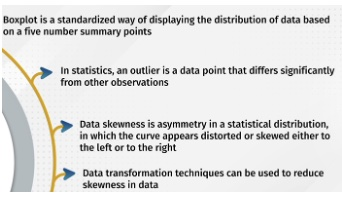